In [27]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Cancer data

In [28]:
import pickle
file = open("data_risk2_dummy","rb")
#file = open("data_agegrp_dummy_drop_all_unknowns","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [29]:
len(X_train.columns)

40

#### <span style="color:blue">Method used</span>
- <span style="color:green">__For feature selection__</span> - We will be using <span style="color:red">__RFE(Recursive Feature Elimination) method__</span>
- <span style="color:green">__For model assessment with detailed statistics__</span> - We will be using <span style="color:red">__statsmodels.api__</span>

__Assumption__
During model building we will remove variable if its <span style="color:blue">__p value > 0.05 & VIF > 2__</span>

In [30]:
#### Running first model

# Importing library for statsmodels
import statsmodels.api as sm

In [31]:
# Importing library for calculating metrics
from sklearn import metrics

# Running Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancer   No. Observations:               113829
Model:                            GLM   Df Residuals:                   113788
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16198.
Date:                Fri, 04 Jun 2021   Deviance:                       32396.
Time:                        13:51:08   Pearson chi2:                 1.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5069      0.191    -28.843      0.000      -5.881      -5.133
menopaus_0     0.7595      0.093      8.140      0.000       0.577       0.942
menopaus_1    -0.7794      0.114     -6.834      0.000      -1.003      -0.556
agegrp_2       1.3210      0.157      8.398      0.000       1.013       1.629
agegrp_3       1.3124      0.156      8.436      0.000       1.007       1.617
agegrp_4       1.5682      0.156     10.069      0.000       1.263       1.873
agegrp_5       2.0278      0.164     12.388      0.000       1.707       2.349
agegrp_6       2.0171      0.164     12.263      0.000       1.695       2.339
agegrp_7       2.0793      0.165     12.638      0.000       1.757       2.402
agegrp_8       2.0107      0.165     12.164      0.000       1.687       2.335
agegrp_9       1.8962      0.167     11.360      0.000       1.569       2.223
agegrp_10      1.5333      0.173      8.854      0.000       1.194       1.873
density_1     -1.7725      0.092    -19.205      0.000      -1.953      -1.592
density_2     -0.1516      0.042     -3.581      0.000      -0.235      -0.069
density_3     -0.0344      0.042     -0.814      0.416      -0.117       0.048
density_4     -0.6959      0.066    -10.610      0.000      -0.824      -0.567
race_1         0.4938      0.051      9.769      0.000       0.395       0.593
race_2        -1.2056      0.095    -12.717      0.000      -1.391      -1.020
race_3        -0.6374      0.080     -8.000      0.000      -0.794      -0.481
race_4        -1.7529      0.167    -10.521      0.000      -2.079      -1.426
race_5        -1.5575      0.151    -10.329      0.000      -1.853      -1.262
hispanic_0     0.8621      0.045     19.329      0.000       0.775       0.949
hispanic_1    -0.6225      0.072     -8.603      0.000      -0.764      -0.481
bmi_1         -0.3543      0.042     -8.380      0.000      -0.437      -0.271
bmi_2         -0.4868      0.046    -10.480      0.000      -0.578      -0.396
bmi_3         -0.9885      0.064    -15.377      0.000      -1.115      -0.863
bmi_4         -1.1973      0.082    -14.515      0.000      -1.359      -1.036
agefirst_0    -0.3933      0.037    -10.594      0.000      -0.466      -0.321
agefirst_1    -1.1248      0.063    -17.787      0.000      -1.249      -1.001
agefirst_2    -1.0097      0.055    -18.341      0.000      -1.118      -0.902
nrelbc_0       0.6921      0.052     13.346      0.000       0.590       0.794
nrelbc_1       0.0144      0.060      0.239      0.811      -0.103       0.132
nrelbc_2      -0.9250      0.141     -6.557      0.000      -1.201      -0.648
brstproc_0     0.7393      0.060     12.312      0.000       0.622       0.857
brstproc_1     0.2599      0.065      4.023      0.000       0.133       0.387
lastmamm_0     0.1207      0.033      3.619      0.000       0.055       0.186
la

In [32]:
# Importing library for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,agegrp_10,0.12
4,agegrp_4,0.07
9,agegrp_9,0.06
3,agegrp_3,0.05
16,race_2,0.05
6,agegrp_6,0.04
8,agegrp_8,0.04
35,lastmamm_1,0.03
1,menopaus_1,0.03
18,race_4,0.03


In [33]:
### Feature selection using RFE

# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced') # Handling class imbalance

rfe = RFE(logreg, 25)             # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('menopaus_0', True, 1),
 ('menopaus_1', False, 4),
 ('agegrp_2', True, 1),
 ('agegrp_3', True, 1),
 ('agegrp_4', True, 1),
 ('agegrp_5', True, 1),
 ('agegrp_6', True, 1),
 ('agegrp_7', True, 1),
 ('agegrp_8', True, 1),
 ('agegrp_9', True, 1),
 ('agegrp_10', True, 1),
 ('density_1', True, 1),
 ('density_2', False, 12),
 ('density_3', False, 15),
 ('density_4', True, 1),
 ('race_1', False, 7),
 ('race_2', True, 1),
 ('race_3', True, 1),
 ('race_4', True, 1),
 ('race_5', True, 1),
 ('hispanic_0', True, 1),
 ('hispanic_1', True, 1),
 ('bmi_1', False, 9),
 ('bmi_2', False, 8),
 ('bmi_3', True, 1),
 ('bmi_4', True, 1),
 ('agefirst_0', False, 2),
 ('agefirst_1', True, 1),
 ('agefirst_2', True, 1),
 ('nrelbc_0', True, 1),
 ('nrelbc_1', False, 14),
 ('nrelbc_2', True, 1),
 ('brstproc_0', False, 3),
 ('brstproc_1', False, 11),
 ('lastmamm_0', False, 16),
 ('lastmamm_1', True, 1),
 ('surgmeno_0', False, 13),
 ('surgmeno_1', False, 10),
 ('hrt_0', False, 6),
 ('hrt_1', False, 5)]

In [35]:
# Selecting only those columns having ranking as 1
col = X_train.columns[rfe.support_]
col

Index(['menopaus_0', 'agegrp_2', 'agegrp_3', 'agegrp_4', 'agegrp_5',
       'agegrp_6', 'agegrp_7', 'agegrp_8', 'agegrp_9', 'agegrp_10',
       'density_1', 'density_4', 'race_2', 'race_3', 'race_4', 'race_5',
       'hispanic_0', 'hispanic_1', 'bmi_3', 'bmi_4', 'agefirst_1',
       'agefirst_2', 'nrelbc_0', 'nrelbc_2', 'lastmamm_1'],
      dtype='object')

In [36]:
#### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancer   No. Observations:               113829
Model:                            GLM   Df Residuals:                   113803
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16599.
Date:                Fri, 04 Jun 2021   Deviance:                       33199.
Time:                        13:52:32   Pearson chi2:                 1.31e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2268      0.160    -32.763      0.000      -5.540      -4.914
menopaus_0     0.9267      0.060     15.554      0.000       0.810       1.043
agegrp_2       1.2635      0.157      8.054      0.000       0.956       1.571
agegrp_3       1.2089      0.154      7.842      0.000       0.907       1.511
agegrp_4       1.4459      0.154      9.390      0.000       1.144       1.748
agegrp_5       1.8427      0.159     11.596      0.000       1.531       2.154
agegrp_6       1.8316      0.160     11.469      0.000       1.519       2.145
agegrp_7       1.8928      0.160     11.851      0.000       1.580       2.206
agegrp_8       1.8249      0.160     11.371      0.000       1.510       2.139
agegrp_9       1.7195      0.162     10.607      0.000       1.402       2.037
agegrp_10      1.3962      0.168      8.287      0.000       1.066       1.726
density_1     -1.6200      0.088    -18.339      0.000      -1.793      -1.447
density_4     -0.5577      0.060     -9.319      0.000      -0.675      -0.440
race_2        -1.4847      0.084    -17.760      0.000      -1.649      -1.321
race_3        -0.8736      0.066    -13.169      0.000      -1.004      -0.744
race_4        -1.9876      0.161    -12.370      0.000      -2.303      -1.673
race_5        -1.7991      0.144    -12.472      0.000      -2.082      -1.516
hispanic_0     1.0228      0.041     24.686      0.000       0.942       1.104
hispanic_1    -0.4522      0.071     -6.340      0.000      -0.592      -0.312
bmi_3         -0.7564      0.061    -12.487      0.000      -0.875      -0.638
bmi_4         -0.9534      0.079    -12.027      0.000      -1.109      -0.798
agefirst_1    -0.8552      0.060    -14.247      0.000      -0.973      -0.738
agefirst_2    -0.7412      0.052    -14.335      0.000      -0.843      -0.640
nrelbc_0       0.5878      0.035     16.743      0.000       0.519       0.657
nrelbc_2      -0.8915      0.135     -6.587      0.000      -1.157      -0.626
lastmamm_1    -1.2542      0.097    -12.876      0.000      -1.445      -1.063
==============================================================================
"""

#### Checking VIFs

In [37]:
# Importing library for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,agegrp_10,0.05
12,race_2,0.03
23,nrelbc_2,0.03
24,lastmamm_1,0.03
14,race_4,0.02
15,race_5,0.02
2,agegrp_3,0.02
8,agegrp_9,0.02
3,agegrp_4,0.02
13,race_3,0.02


__All the feature has p < 0.05 and VIF < 2__

In [38]:
X_train=X_train[col]
X_test=X_test[col]

In [39]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

In [40]:
def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))

    sensi = TP / float(TP+FN)
    speci = TN / float(TN+FP)
    # Let's see the sensitivity of our model
    print("Sensitivity:", sensi)

    # Let us calculate specificity
    print("Specificity:", speci)

    print("Average:", (sensi+speci)/2)
    
    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    
    # Predicting probability for roc_auc
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.2}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
### 2: Model Building

# Importing LogisticRegression and metrics from sklearn library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [42]:
### Building model using regularization and cross validation

# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [17]:
### Building model using regularization and cross validation

# Specify range of hyper-parameters to tune
hyper_params = {'penalty': ['l1','l2','elasticnet']}

# Specify model for logistic regression with option to treat class imbalance and perform grid search
logreg = LogisticRegression(class_weight='balanced')

# GridSearchCV
model_cv = GridSearchCV(estimator = logreg,
                       param_grid = hyper_params,
                       scoring = "balanced_accuracy",
                       cv = folds,
                       verbose = 1,
                       return_train_score = True,
                       n_jobs=-1)

# Fit the model
model_cv.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", model_cv.best_score_)
print("\n")
print(model_cv.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished


best balanced accuracy 0.7739536910428366


LogisticRegression(class_weight='balanced')


In [43]:
### Building model using regularization and cross validation

# Specify range of hyper-parameters to tune
hyper_params = {'C': [10, 1, 0.5, 0.1]}

# Specify model for logistic regression with option to treat class imbalance and perform grid search
logreg = LogisticRegression(class_weight='balanced')

# GridSearchCV
model_cv = GridSearchCV(estimator = logreg,
                       param_grid = hyper_params,
                       scoring = "balanced_accuracy",
                       cv = folds,
                       verbose = 1,
                       return_train_score = True,
                       n_jobs=-1)

# Fit the model
model_cv.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", model_cv.best_score_)
print("\n")
print(model_cv.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


best balanced accuracy 0.6831550048925167


LogisticRegression(C=1, class_weight='balanced')


In [44]:
# It looks that C=10 is the best value with RFE=25

# Running Logistic Regression on Optimal hyperparameter value
logreg = LogisticRegression(C=1, class_weight='balanced')

logreg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced')

# Coefficients
logreg.coef_

# List of cols with their coefficients
val=logreg.coef_.reshape(-1)
coef = (pd.DataFrame(val, index = X_train.columns, columns = ['coeff'] ))
coef = coef.sort_values(by = 'coeff', ascending=False)
coef

In [45]:
# List of cols with their coefficients
val=logreg.coef_.reshape(-1)
coef = (pd.DataFrame(val, index=X_train.columns, columns = ['Coefficients'] )).reset_index()
coef = coef.rename(columns={'index':'Features'})
coef = coef.sort_values(by = 'Coefficients', ascending=False)
coef=coef.loc[(np.abs(coef.Coefficients)>=0.3)]
coef

,Features,Coefficients
6,agegrp_7,1.817424
7,agegrp_8,1.766833
5,agegrp_6,1.729050
4,agegrp_5,1.700184
8,agegrp_9,1.666406
3,agegrp_4,1.361740
9,agegrp_10,1.353513
1,agegrp_2,1.087217
2,agegrp_3,1.080235
16,hispanic_0,0.925134


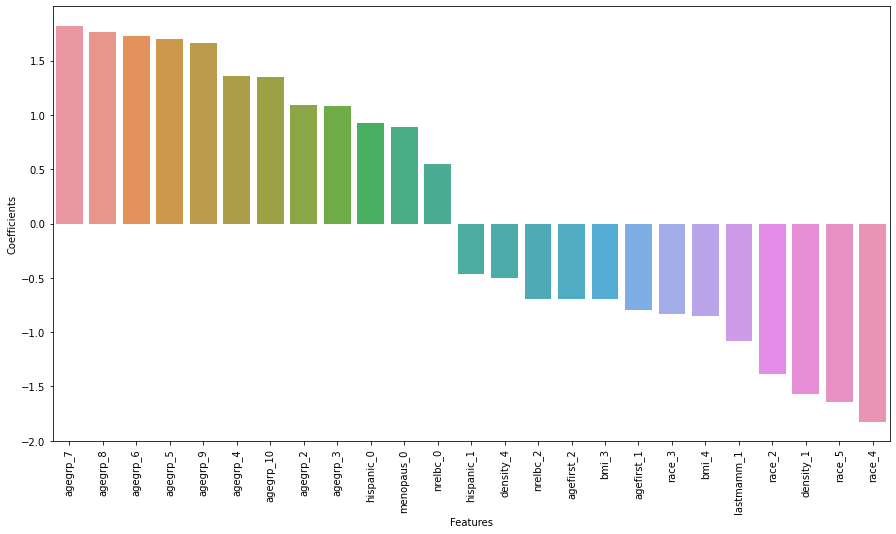

In [46]:
# Plotting important features against their coefficients
print()
plt.figure(figsize=(15,8))
plt.subplot(111)
ax1 = sns.barplot(x = coef['Features'], y = coef['Coefficients'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)
#plt.ylabel('Coefficients')
plt.show()

In [47]:
y_pred_train=logreg.predict(X_train)

Confusion Matrix ->
[[72206 37330]
 [ 1247  3046]]
Accuracy: 0.6610969085206757
Sensitivity: 0.7095271372000932
Specificity: 0.6591988022202746
Average: 0.6843629697101838
Precision 0.0754408559540321
MCC  0.1468236981693596
F1  0.13638093532427412
F2  0.2646486411343574
F3  0.38550618252692603
ROC-AUC : 0.75


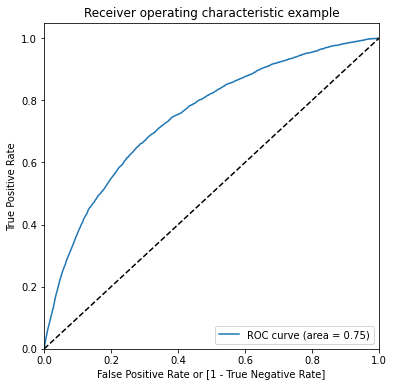

In [48]:
model_stats(X_train, y_train, y_pred_train, logreg)

Confusion Matrix ->
[[34074 23856]
 [  436  1135]]
Accuracy: 0.5917379539839667
Sensitivity: 0.7224697644812221
Specificity: 0.5881926462972553
Average: 0.6553312053892387
Precision 0.04541634988595895
MCC  0.10091698521641787
F1  0.08546043219637076
F2  0.18145483613109512
F3  0.2900587784308714
ROC-AUC : 0.71


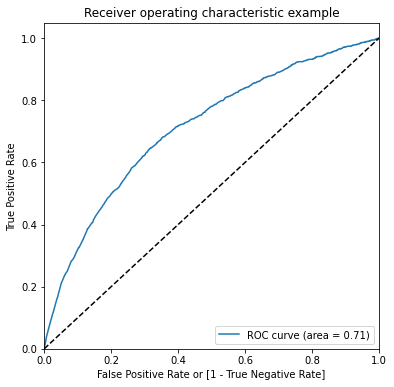

In [50]:
# Running Logistic Regression with class_weight parameter to handle class imbalance
y_pred_test=logreg.predict(X_test)

model_stats(X_test, y_test, y_pred_test, logreg)